In [1]:
pip install pydo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.layers import Dense
import json 
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from sklearn.model_selection import train_test_split

import tensorflow as tf
import pickle
from tensorflow.keras import layers , activations , models , preprocessing, utils
import re

import yaml
import os


In [3]:

df = pd.read_excel('datanew.xlsx')  # Replace 'your_file.xlsx' with your file name

# Forward fill the empty cells in the 'questions' column
df['question'].fillna(method='ffill', inplace=True)

# Now, df contains your data with empty cells in 'questions' filled with the last non-empty value

C:\Users\rizwa\AppData\Local\Temp\ipykernel_24664\1875331420.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['question'].fillna(method='ffill', inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1669 non-null   object
 1   answer    1666 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB


In [5]:
df.head(5)

,question,answer
0,"A year-long, hands-on business incubation prog...",NVD allows students to pursue a startup idea ...
1,About the U of A Office of Entrepreneurship an...,About the U of A Office of Entrepreneurship an...
2,student looking for some seed funding to help ...,then apply to the 19th annual Slate New Ventu...
3,Can non-business students enter the competition?,Yes. The Dempsey Startup Competition is open t...
4,"Do you have a great innovative ag idea, but do...",students who have innovative ag ideas to part...


In [6]:

# Check for empty cells in the DataFrame
empty_cells = df.isna().sum()

# You can print or use 'empty_cells' to identify which columns have empty cells
print(empty_cells)

question    0
answer      3
dtype: int64


In [7]:

# Remove empty rows
df_cleaned = df.dropna()

In [8]:

# Check for empty cells in the DataFrame
empty_cells = df_cleaned.isna().sum()

# You can print or use 'empty_cells' to identify which columns have empty cells
print(empty_cells)

question    0
answer      0
dtype: int64


In [9]:
df_cleaned.head()

,question,answer
0,"A year-long, hands-on business incubation prog...",NVD allows students to pursue a startup idea ...
1,About the U of A Office of Entrepreneurship an...,About the U of A Office of Entrepreneurship an...
2,student looking for some seed funding to help ...,then apply to the 19th annual Slate New Ventu...
3,Can non-business students enter the competition?,Yes. The Dempsey Startup Competition is open t...
4,"Do you have a great innovative ag idea, but do...",students who have innovative ag ideas to part...


In [10]:
#text analytics
import pandas as pd

# Assuming your cleaned data is already loaded into a DataFrame named df_cleaned

# Display basic information about the DataFrame
print("DataFrame Info:")
print(df_cleaned.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Word count for each question and answer
df_cleaned['question_word_count'] = df_cleaned['question'].apply(lambda x: len(x.split()))
df_cleaned['answer_word_count'] = df_cleaned['answer'].apply(lambda x: len(x.split()))

# Display average word count for questions and answers
print("\nAverage Word Count:")
print("Question: {:.2f} words".format(df_cleaned['question_word_count'].mean()))
print("Answer: {:.2f} words".format(df_cleaned['answer_word_count'].mean()))


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1666 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1666 non-null   object
 1   answer    1666 non-null   object
dtypes: object(2)
memory usage: 39.0+ KB
None

Summary Statistics:
                                                 question  \
count                                                1666   
unique                                               1189   
top     What should students do if they encounter issu...   
freq                                                    8   

                                                   answer  
count                                                1666  
unique                                               1581  
top     A bachelor apartment is a single-room living s...  
freq                                                    7  

Average Word Count:
Question: 12.93 words
Answer: 30.50 w

C:\Users\rizwa\AppData\Local\Temp\ipykernel_24664\3741105817.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['question_word_count'] = df_cleaned['question'].apply(lambda x: len(x.split()))
C:\Users\rizwa\AppData\Local\Temp\ipykernel_24664\3741105817.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['answer_word_count'] = df_cleaned['answer'].apply(lambda x: len(x.split()))


In [11]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


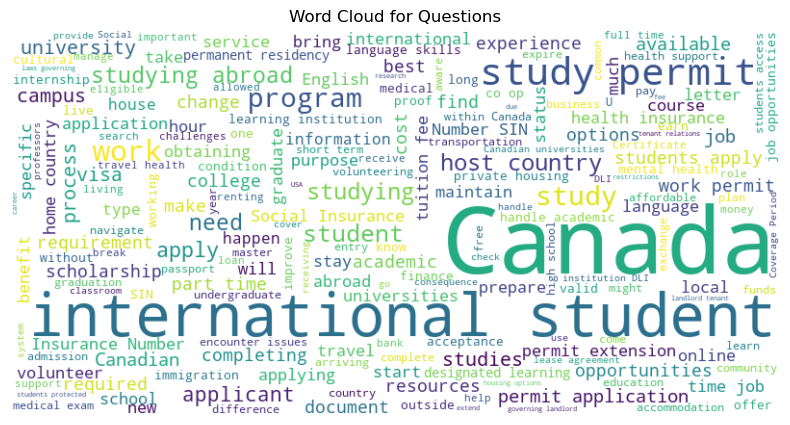

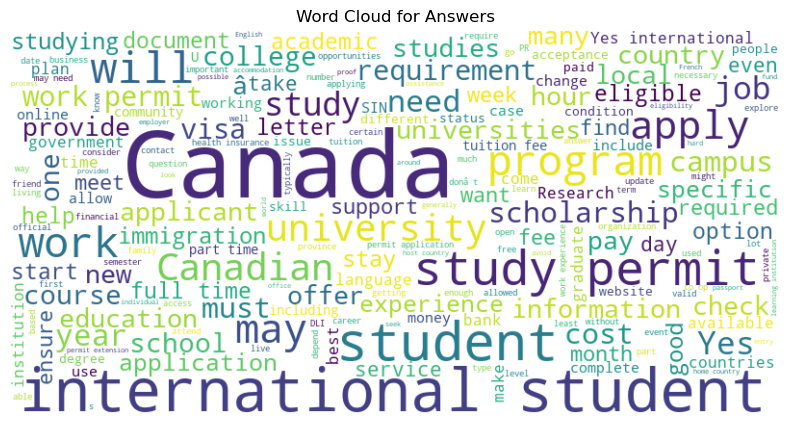

In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your cleaned data is already loaded into a DataFrame named df_cleaned

# Combine all questions and answers into single strings
all_questions = ' '.join(df_cleaned['question'])
all_answers = ' '.join(df_cleaned['answer'])

# Create word clouds for questions
wordcloud_questions = WordCloud(width=800, height=400, background_color='white').generate(all_questions)

# Create word clouds for answers
wordcloud_answers = WordCloud(width=800, height=400, background_color='white').generate(all_answers)

# Plot word clouds for questions
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_questions, interpolation='bilinear')
plt.title('Word Cloud for Questions')
plt.axis('off')
plt.show()

# Plot word clouds for answers
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_answers, interpolation='bilinear')
plt.title('Word Cloud for Answers')
plt.axis('off')
plt.show()


In [13]:
questions = df_cleaned['question'].tolist()
answers = df_cleaned['answer'].tolist()

In [14]:
answers_with_tags = []
for i in range(len(answers)):
    if type(answers[i]) == str:
        answers_with_tags.append(answers[i])
    else:
        questions.pop(i)

answers = []
for i in range(len(answers_with_tags)) :
    answers.append('<START> ' + answers_with_tags[i] + ' <END>')

tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions + answers)
VOCAB_SIZE = len(tokenizer.word_index)+1

In [15]:
from gensim.models import Word2Vec
import re

vocab = []
for word in tokenizer.word_index:
    vocab.append(word)

def tokenize(sentences):
    tokens_list = []
    vocabulary = []
    for sentence in sentences:
        sentence = sentence.lower()
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        tokens = sentence.split()
        vocabulary += tokens
        tokens_list.append(tokens)
    return tokens_list , vocabulary

In [16]:
# encoder_input_data
tokenized_questions = tokenizer.texts_to_sequences(questions)
maxlen_questions = max([len(x) for x in tokenized_questions])
padded_questions = preprocessing.sequence.pad_sequences(tokenized_questions , maxlen=maxlen_questions , padding='post')
encoder_input_data = np.array(padded_questions)

In [17]:
encoder_input_data.shape

(1666, 45)

In [18]:
# decoder_input_data
tokenized_answers = tokenizer.texts_to_sequences(answers)
maxlen_answers = max([len(x) for x in tokenized_answers])
padded_answers = preprocessing.sequence.pad_sequences(tokenized_answers , maxlen=maxlen_answers , padding='post')
decoder_input_data = np.array(padded_answers)

In [19]:
decoder_input_data.shape

(1666, 167)

In [20]:
# decoder_output_data
tokenized_answers = tokenizer.texts_to_sequences(answers)
for i in range(len(tokenized_answers)) :
    tokenized_answers[i] = tokenized_answers[i][1:]
padded_answers = preprocessing.sequence.pad_sequences(tokenized_answers , maxlen=maxlen_answers , padding='post')
onehot_answers = utils.to_categorical(padded_answers , VOCAB_SIZE)
decoder_output_data = np.array(onehot_answers)

In [21]:
decoder_output_data.shape

(1666, 167, 4755)

In [22]:
# Embedding, LSTM and Desne layers
encoder_inputs = tf.keras.layers.Input(shape=(maxlen_questions ,))
encoder_embedding = tf.keras.layers.Embedding(VOCAB_SIZE, 200 , mask_zero=True) (encoder_inputs)
encoder_outputs , state_h , state_c = tf.keras.layers.LSTM(200 , return_state=True)(encoder_embedding)
encoder_states = [ state_h , state_c ]

decoder_inputs = tf.keras.layers.Input(shape=(maxlen_answers , ))
decoder_embedding = tf.keras.layers.Embedding(VOCAB_SIZE, 200 , mask_zero=True) (decoder_inputs)
decoder_lstm = tf.keras.layers.LSTM(200 , return_state=True , return_sequences=True)
decoder_outputs , _ , _ = decoder_lstm (decoder_embedding , initial_state=encoder_states)


decoder_dense = tf.keras.layers.Dense(VOCAB_SIZE , activation=tf.keras.activations.softmax) 
output = decoder_dense (decoder_outputs)

model = tf.keras.models.Model([encoder_inputs, decoder_inputs], output)

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 45)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 167)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 45, 200)              951000    ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 167, 200)             951000    ['input_2[0][0]']             
                                                                                              

In [25]:
model.fit([encoder_input_data , decoder_input_data], decoder_output_data, batch_size=16, epochs=70)


Epoch 1/70
105/105 [==============================] - 28s 220ms/step - loss: 6.7632 - accuracy: 0.0410
Epoch 2/70
105/105 [==============================] - 24s 229ms/step - loss: 6.0921 - accuracy: 0.0660
Epoch 3/70
105/105 [==============================] - 24s 231ms/step - loss: 5.8762 - accuracy: 0.0907
Epoch 4/70
105/105 [==============================] - 24s 225ms/step - loss: 5.6532 - accuracy: 0.1142
Epoch 5/70
105/105 [==============================] - 24s 225ms/step - loss: 5.4574 - accuracy: 0.1365
Epoch 6/70
105/105 [==============================] - 24s 232ms/step - loss: 5.2755 - accuracy: 0.1575
Epoch 7/70
105/105 [==============================] - 24s 232ms/step - loss: 5.1152 - accuracy: 0.1741
Epoch 8/70
105/105 [==============================] - 24s 226ms/step - loss: 4.9798 - accuracy: 0.1879
Epoch 9/70
105/105 [==============================] - 25s 240ms/step - loss: 4.8429 - accuracy: 0.2013
Epoch 10/70
105/105 [==============================] - 24s 232ms/step - l

In [26]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
def inference():
    
    encoder_model = tf.keras.models.Model(encoder_inputs, encoder_states)
    
    decoder_state_input_h = tf.keras.layers.Input(shape=(200 ,))
    decoder_state_input_c = tf.keras.layers.Input(shape=(200 ,))
    
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding , initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    
    decoder_model = tf.keras.models.Model([decoder_inputs] + decoder_states_inputs,[decoder_outputs] + decoder_states)
    
    return encoder_model , decoder_model

def preprocess_input(input_sentence):
    tokens = input_sentence.lower().split()
    tokens_list = []
    for word in tokens:
        tokens_list.append(tokenizer.word_index[word]) 
    return preprocessing.sequence.pad_sequences([tokens_list] , maxlen=maxlen_questions , padding='post')

In [28]:
enc_model , dec_model = inference()

In [29]:
tests = ['what is sds']

# Accessing the single item directly without a loop
states_values = enc_model.predict(preprocess_input(tests[0]))
empty_target_seq = np.zeros((1 , 1))
empty_target_seq[0, 0] = tokenizer.word_index['start']
stop_condition = False
decoded_translation = ''

while not stop_condition:
    dec_outputs, h, c = dec_model.predict([empty_target_seq] + states_values)
    sampled_word_index = np.argmax(dec_outputs[0, -1, :])
    sampled_word = None
    
    for word, index in tokenizer.word_index.items():
        if sampled_word_index == index:
            decoded_translation += f' {word}'
            sampled_word = word
    
    if sampled_word == 'end' or len(decoded_translation.split()) > maxlen_answers:
        stop_condition = True
        
    empty_target_seq = np.zeros((1 , 1))  
    empty_target_seq[0 , 0] = sampled_word_index
    states_values = [h , c] 

print(f'Human: {tests[0]}');
decoded_translation = decoded_translation.split(' end')[0]
print(f'Bot: {decoded_translation}');
print('-'*25);


1/1 [==============================] - 0s 25ms/step
Human: what is sds
Bot:  sds was introduced by the government to a canadian degree or a social insurance number of community outreach social and community development workers provide information to students with disabilities  
-------------------------


In [30]:

tests = ['Can I bring my pet with me while studying abroad']

# Accessing the single item directly without a loop
states_values = enc_model.predict(preprocess_input(tests[0]))
empty_target_seq = np.zeros((1 , 1))
empty_target_seq[0, 0] = tokenizer.word_index['start']
stop_condition = False
decoded_translation = ''

while not stop_condition:
    dec_outputs, h, c = dec_model.predict([empty_target_seq] + states_values)
    sampled_word_index = np.argmax(dec_outputs[0, -1, :])
    sampled_word = None
    
    for word, index in tokenizer.word_index.items():
        if sampled_word_index == index:
            decoded_translation += f' {word}'
            sampled_word = word
    
    if sampled_word == 'end' or len(decoded_translation.split()) > maxlen_answers:
        stop_condition = True
        
    empty_target_seq = np.zeros((1 , 1))  
    empty_target_seq[0 , 0] = sampled_word_index
    states_values = [h , c] 

print(f'Human: {tests[0]}');
decoded_translation = decoded_translation.split(' end')[0]
print(f'Bot: {decoded_translation}');
print('-'*25);


1/1 [==============================] - 0s 16ms/step
Human: Can I bring my pet with me while studying abroad
Bot:  check the visa regulations and requirements for obtaining a local driving test
-------------------------


In [31]:

tests = ['What is a SIN number and why is it important for international students in Canada']

# Accessing the single item directly without a loop
states_values = enc_model.predict(preprocess_input(tests[0]))
empty_target_seq = np.zeros((1 , 1))
empty_target_seq[0, 0] = tokenizer.word_index['start']
stop_condition = False
decoded_translation = ''

while not stop_condition:
    dec_outputs, h, c = dec_model.predict([empty_target_seq] + states_values)
    sampled_word_index = np.argmax(dec_outputs[0, -1, :])
    sampled_word = None
    
    for word, index in tokenizer.word_index.items():
        if sampled_word_index == index:
            decoded_translation += f' {word}'
            sampled_word = word
    
    if sampled_word == 'end' or len(decoded_translation.split()) > maxlen_answers:
        stop_condition = True
        
    empty_target_seq = np.zeros((1 , 1))  
    empty_target_seq[0 , 0] = sampled_word_index
    states_values = [h , c] 

print(f'Human: {tests[0]}');
decoded_translation = decoded_translation.split(' end')[0]
print(f'Bot: {decoded_translation}');
print('-'*25);


1/1 [==============================] - 0s 16ms/step
Human: What is a SIN number and why is it important for international students in Canada
Bot:  a social insurance number sin is a nine digit number provided by the government of canada it is issued by the government of a canadian school year post secondary school
-------------------------


In [32]:
#evaluation
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate import rouge_score

# Assuming you have reference responses for comparison
reference_responses = [['A reference response']]

# Replace 'generated_response' with your actual generated response
generated_response = 'The generated response'

# BLEU Score
smoothie = SmoothingFunction().method4  # Choose a smoothing function
bleu_score = sentence_bleu(reference_responses, generated_response, smoothing_function=smoothie)
print(f'BLEU Score: {bleu_score}')

# ROUGE Score
rouge_score = rouge_score.rouge_n(
    [generated_response],
    reference_responses,
    2,  # Choose the 'n' in ROUGE-N (e.g., ROUGE-2)
    alpha=0.5,
    beta=0.5,
    use_stemmer=True
)
print(f'ROUGE Score: {rouge_score}')


ImportError: cannot import name 'rouge_score' from 'nltk.translate' (C:\Users\rizwa\anaconda3\lib\site-packages\nltk\translate\__init__.py)